In [1]:
import pandas as pd

In [2]:
#impoort numpy, scipy, math, matplotlib

In [3]:
import numpy as np

In [4]:
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [5]:
#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

In [6]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.cross_validation import train_test_split

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [7]:
pip install sklearn.cross_validation

ERROR: Could not find a version that satisfies the requirement sklearn.cross_validation (from versions: none)
ERROR: No matching distribution found for sklearn.cross_validation
Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#data
raw_credit = pd.read_csv('desktop/clean_credit.csv')
raw_credit.head()

,Unnamed: 0,LIMIT_BAL,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,LSEX,LEDUCATION,LDEFAULT,AGEBIN,LIMIT_BALBIN,AGEBIN2,LIMIT_BALBIN2
0,204,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,3,0,"(20.942, 35.5]","(9010.0, 257500.0]",0,0
1,205,120000,2,26,-1,2,0,0,0,2,...,1000,0,2000,0,3,0,"(20.942, 35.5]","(9010.0, 257500.0]",0,0
2,206,90000,2,34,0,0,0,0,0,0,...,1000,1000,5000,0,3,1,"(20.942, 35.5]","(9010.0, 257500.0]",0,0
3,207,50000,1,37,0,0,0,0,0,0,...,1100,1069,1000,0,3,1,"(35.5, 50.0]","(9010.0, 257500.0]",1,0
4,208,50000,1,57,-1,0,-1,0,0,0,...,9000,689,679,1,3,1,"(50.0, 64.5]","(9010.0, 257500.0]",2,0


In [10]:
raw_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     30000 non-null  int64 
 1   LIMIT_BAL      30000 non-null  int64 
 2   MARRIAGE       30000 non-null  int64 
 3   AGE            30000 non-null  int64 
 4   PAY_1          30000 non-null  int64 
 5   PAY_2          30000 non-null  int64 
 6   PAY_3          30000 non-null  int64 
 7   PAY_4          30000 non-null  int64 
 8   PAY_5          30000 non-null  int64 
 9   PAY_6          30000 non-null  int64 
 10  BILL_AMT1      30000 non-null  int64 
 11  BILL_AMT2      30000 non-null  int64 
 12  BILL_AMT3      30000 non-null  int64 
 13  BILL_AMT4      30000 non-null  int64 
 14  BILL_AMT5      30000 non-null  int64 
 15  BILL_AMT6      30000 non-null  int64 
 16  PAY_AMT1       30000 non-null  int64 
 17  PAY_AMT2       30000 non-null  int64 
 18  PAY_AMT3       30000 non-n

In [11]:
raw_credit=raw_credit.drop(['LIMIT_BAL', 'MARRIAGE'],axis = 1)

In [12]:
#features
X = raw_credit.iloc[0,6,27]
print('Summary of feature sample')
X.head()

IndexingError: Too many indexers

In [13]:
raw_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     30000 non-null  int64 
 1   AGE            30000 non-null  int64 
 2   PAY_1          30000 non-null  int64 
 3   PAY_2          30000 non-null  int64 
 4   PAY_3          30000 non-null  int64 
 5   PAY_4          30000 non-null  int64 
 6   PAY_5          30000 non-null  int64 
 7   PAY_6          30000 non-null  int64 
 8   BILL_AMT1      30000 non-null  int64 
 9   BILL_AMT2      30000 non-null  int64 
 10  BILL_AMT3      30000 non-null  int64 
 11  BILL_AMT4      30000 non-null  int64 
 12  BILL_AMT5      30000 non-null  int64 
 13  BILL_AMT6      30000 non-null  int64 
 14  PAY_AMT1       30000 non-null  int64 
 15  PAY_AMT2       30000 non-null  int64 
 16  PAY_AMT3       30000 non-null  int64 
 17  PAY_AMT4       30000 non-null  int64 
 18  PAY_AMT5       30000 non-n

In [14]:
raw_credit=raw_credit.drop(['AGE', 'LSEX','AGEBIN','LIMIT_BALBIN','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis = 1)

In [15]:
raw_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     30000 non-null  int64
 1   PAY_1          30000 non-null  int64
 2   PAY_2          30000 non-null  int64
 3   PAY_3          30000 non-null  int64
 4   PAY_4          30000 non-null  int64
 5   PAY_5          30000 non-null  int64
 6   PAY_6          30000 non-null  int64
 7   PAY_AMT1       30000 non-null  int64
 8   PAY_AMT2       30000 non-null  int64
 9   PAY_AMT3       30000 non-null  int64
 10  PAY_AMT4       30000 non-null  int64
 11  PAY_AMT5       30000 non-null  int64
 12  PAY_AMT6       30000 non-null  int64
 13  LEDUCATION     30000 non-null  int64
 14  LDEFAULT       30000 non-null  int64
 15  AGEBIN2        30000 non-null  int64
 16  LIMIT_BALBIN2  30000 non-null  int64
dtypes: int64(17)
memory usage: 3.9 MB


In [16]:
raw_credit=raw_credit.drop(['PAY_AMT1','PAY_AMT2','PAY_AMT3', 'PAY_AMT4','PAY_AMT5','PAY_AMT6'],axis = 1)

In [17]:
raw_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     30000 non-null  int64
 1   PAY_1          30000 non-null  int64
 2   PAY_2          30000 non-null  int64
 3   PAY_3          30000 non-null  int64
 4   PAY_4          30000 non-null  int64
 5   PAY_5          30000 non-null  int64
 6   PAY_6          30000 non-null  int64
 7   LEDUCATION     30000 non-null  int64
 8   LDEFAULT       30000 non-null  int64
 9   AGEBIN2        30000 non-null  int64
 10  LIMIT_BALBIN2  30000 non-null  int64
dtypes: int64(11)
memory usage: 2.5 MB


In [18]:
#features
X = raw_credit.iloc[:,0:9]
X.drop('LDEFAULT', axis=1, inplace=True)
print('Summary of feature sample')
X.head()

Summary of feature sample


/Users/jamessanders/opt/miniconda3/envs/conda-env/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Unnamed: 0,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,LEDUCATION
0,204,2,2,-1,-1,-2,-2,3
1,205,-1,2,0,0,0,2,3
2,206,0,0,0,0,0,0,3
3,207,0,0,0,0,0,0,3
4,208,-1,0,-1,0,0,0,3


In [19]:
#dependent variable
y = raw_credit['LDEFAULT']

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression(n_jobs=10)

In [22]:
#dependent variable
print(y)

0        0
1        0
2        1
3        1
4        1
        ..
29995    1
29996    1
29997    0
29998    0
29999    0
Name: LDEFAULT, Length: 30000, dtype: int64


In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
print(cross_val_score(model, X, y, cv=3)) 

[0.0935742  0.11889546 0.11175088]


In [25]:
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))


In [26]:
#regression
results = []
names = []
for name, model in algosClass:
 result = cross_val_score(model, X,y, cv=3, scoring='r2')
names.append(name)
results.append(result)



In [27]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor -0.0857868721987907


In [28]:
algosClass = []
algosClass.append(('Linear Regression',RandomForestRegressor()))


In [29]:
#regression
results = []
names = []
for name, model in algosClass:
 result = cross_val_score(model, X,y, cv=3, scoring='r2')
names.append(name)
results.append(result)

In [30]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Linear Regression 0.10807351365187685


In [31]:
algosClass = []
algosClass.append(('Support Vector Regression',SVR()))
#regression
results = []
names = []
for name, model in algosClass:
 result = cross_val_score(model, X,y, cv=3, scoring='r2')
names.append(name)
results.append(result)
for i in range(len(names)):
    print(names[i],results[i].mean())

Support Vector Regression -0.08843206957462309


In [32]:
algo = RandomForestRegressor ()

In [33]:
# Dependent Variable
y = raw_credit['LDEFAULT']

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

#Modeling (Regression)
algo = RandomForestRegressor ()
modelRF = algo.fit(X_train,y_train)

#Predictions
preds = modelRF.predict(X_test)


In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [35]:
from math import sqrt

In [36]:
rmse = sqrt(mean_squared_error(y_test, preds))

In [37]:
predRsquared = r2_score(y_test,preds)

In [38]:
#Make Predictions
preds = modelRF.predict(X_test)
predRsquared = r2_score(y_test,preds)
rmse = sqrt(mean_squared_error(y_test, preds))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.004
RMSE: 0.411


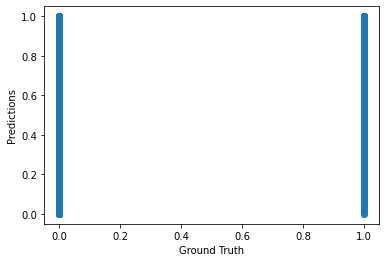

In [39]:
plt.scatter(y_test, preds, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [40]:
#re-importing cleaned data for classification model
class_credit = pd.read_csv('desktop/clean_credit.csv')
class_credit.head()

,Unnamed: 0,LIMIT_BAL,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,LSEX,LEDUCATION,LDEFAULT,AGEBIN,LIMIT_BALBIN,AGEBIN2,LIMIT_BALBIN2
0,204,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,3,0,"(20.942, 35.5]","(9010.0, 257500.0]",0,0
1,205,120000,2,26,-1,2,0,0,0,2,...,1000,0,2000,0,3,0,"(20.942, 35.5]","(9010.0, 257500.0]",0,0
2,206,90000,2,34,0,0,0,0,0,0,...,1000,1000,5000,0,3,1,"(20.942, 35.5]","(9010.0, 257500.0]",0,0
3,207,50000,1,37,0,0,0,0,0,0,...,1100,1069,1000,0,3,1,"(35.5, 50.0]","(9010.0, 257500.0]",1,0
4,208,50000,1,57,-1,0,-1,0,0,0,...,9000,689,679,1,3,1,"(50.0, 64.5]","(9010.0, 257500.0]",2,0


In [41]:
class_credit=class_credit.drop(['Unnamed: 0', 'AGEBIN','LIMIT_BALBIN'],axis = 1)

In [42]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
X=class_credit.drop(['LDEFAULT'],axis=1)
X=scaling.fit_transform(X)

In [43]:
y=class_credit['LDEFAULT']

In [44]:


params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [45]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [46]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [47]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [48]:
brew install libomp

SyntaxError: invalid syntax (<ipython-input-48-6502e8fc9f2e>, line 1)

In [49]:

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [53]:
classifier=xgboost.XGBClassifier()

In [54]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [55]:
from datetime import datetime
start_time = timer(None) 
random_search.fit(X,y)
timer(start_time) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/jamessanders/opt/miniconda3/envs/conda-env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 32.78 seconds.


In [56]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.3,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [58]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0.1, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None,
       subsample=1)

In [59]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)

/Users/jamessanders/opt/miniconda3/envs/conda-env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jamessanders/opt/miniconda3/envs/conda-env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jamessanders/opt/miniconda3/envs/conda-env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jamessanders/opt/miniconda3/envs/conda-env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jamessanders/opt/miniconda3/envs/conda-env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jamessanders/opt/miniconda3/envs/conda-env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jamessanders/opt/miniconda3/envs/conda-env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jamessanders/opt/miniconda3/envs/conda-env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jamessanders/opt/miniconda3/envs/conda-env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jamessanders/opt/miniconda3/envs/conda-env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [60]:
score

array([0.80533333, 0.81266667, 0.816     , 0.80533333, 0.81533333,
       0.83066667, 0.835     , 0.83266667, 0.82733333, 0.825     ])

In [61]:
score.mean()

0.8205333333333332

In [62]:
#wanted to further explore regression so repimporting that data frame

In [63]:
raw_credit = pd.read_csv('desktop/clean_credit.csv')
raw_credit.head()

,Unnamed: 0,LIMIT_BAL,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,LSEX,LEDUCATION,LDEFAULT,AGEBIN,LIMIT_BALBIN,AGEBIN2,LIMIT_BALBIN2
0,204,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,3,0,"(20.942, 35.5]","(9010.0, 257500.0]",0,0
1,205,120000,2,26,-1,2,0,0,0,2,...,1000,0,2000,0,3,0,"(20.942, 35.5]","(9010.0, 257500.0]",0,0
2,206,90000,2,34,0,0,0,0,0,0,...,1000,1000,5000,0,3,1,"(20.942, 35.5]","(9010.0, 257500.0]",0,0
3,207,50000,1,37,0,0,0,0,0,0,...,1100,1069,1000,0,3,1,"(35.5, 50.0]","(9010.0, 257500.0]",1,0
4,208,50000,1,57,-1,0,-1,0,0,0,...,9000,689,679,1,3,1,"(50.0, 64.5]","(9010.0, 257500.0]",2,0


In [64]:
raw_credit=raw_credit.drop(['AGE', 'LSEX','AGEBIN','LIMIT_BALBIN','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis = 1)

In [65]:
raw_credit=raw_credit.drop(['LIMIT_BAL', 'MARRIAGE' ],axis = 1)

In [66]:
raw_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   LIMIT_BAL      30000 non-null  int64
 1   MARRIAGE       30000 non-null  int64
 2   PAY_1          30000 non-null  int64
 3   PAY_2          30000 non-null  int64
 4   PAY_3          30000 non-null  int64
 5   PAY_4          30000 non-null  int64
 6   PAY_5          30000 non-null  int64
 7   PAY_6          30000 non-null  int64
 8   PAY_AMT1       30000 non-null  int64
 9   LEDUCATION     30000 non-null  int64
 10  LDEFAULT       30000 non-null  int64
 11  AGEBIN2        30000 non-null  int64
 12  LIMIT_BALBIN2  30000 non-null  int64
dtypes: int64(13)
memory usage: 3.0 MB


In [77]:
raw_credit=raw_credit.drop(['PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6' ],axis = 1)

In [78]:
#features
X = raw_credit.iloc[:,0:10]
X.drop('LDEFAULT', axis=1, inplace=True)
print('Summary of feature sample')
X.head()

Summary of feature sample


/Users/jamessanders/opt/miniconda3/envs/conda-env/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,PAY_1,PAY_AMT1,LEDUCATION,AGEBIN2,LIMIT_BALBIN2
0,2,0,3,0,0
1,-1,0,3,0,0
2,0,1518,3,0,0
3,0,2000,3,1,0
4,-1,2000,3,2,0


In [79]:
raw_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   PAY_1          30000 non-null  int64
 1   PAY_AMT1       30000 non-null  int64
 2   LEDUCATION     30000 non-null  int64
 3   LDEFAULT       30000 non-null  int64
 4   AGEBIN2        30000 non-null  int64
 5   LIMIT_BALBIN2  30000 non-null  int64
dtypes: int64(6)
memory usage: 1.4 MB


In [80]:
#dependent variable
y = raw_credit['LDEFAULT']

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
model = LinearRegression(n_jobs=10)

In [83]:
print(cross_val_score(model, X, y, cv=3)) 

[0.09437435 0.11886307 0.1136202 ]


In [84]:
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))


In [85]:
#regression
results = []
names = []
for name, model in algosClass:
 result = cross_val_score(model, X,y, cv=3, scoring='r2')
names.append(name)
results.append(result)



In [86]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.0379354120897983


In [87]:
algosClass = []
algosClass.append(('Support Vector Regression',SVR()))
#regression
results = []
names = []
for name, model in algosClass:
 result = cross_val_score(model, X,y, cv=3, scoring='r2')
names.append(name)
results.append(result)
for i in range(len(names)):
    print(names[i],results[i].mean())

Support Vector Regression -0.08560178159715918


In [88]:
algosClass = []
algosClass.append(('Linear Regression',LinearRegression()))
#regression
results = []
names = []
for name, model in algosClass:
 result = cross_val_score(model, X,y, cv=3, scoring='r2')
names.append(name)
results.append(result)
for i in range(len(names)):
    print(names[i],results[i].mean())

Linear Regression 0.10895253993490535


In [ ]:
algosClass.append(('Linear Regression',LinearRegression()))